In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import pyproj
import properscoring as ps
import xarray as xr
import tqdm

In [2]:
combi = xr.open_mfdataset("combiprecip_201805.nc", combine='by_coords') # CombiPrecip
cosmo = xr.open_zarr("cosmoe_prec_201805.zarr") # COSMO-E

In [3]:
# Transform to Swiss coordinate system
src_proj = pyproj.Proj("EPSG:4326") # WSG84
dst_proj = pyproj.Proj("EPSG:21781") # CH1903 / LV03 
src_x = cosmo.lon.values
src_y = cosmo.lat.values
dst_x, dst_y = pyproj.transform(src_proj, dst_proj, src_x, src_y, always_xy=True)
cosmo = cosmo.assign_coords({"chx": (("y", "x"), dst_x) , "chy": (("y", "x"), dst_y)})

/Users/alexandrabutoi/opt/anaconda3/envs/Realistic-looking-rainfall-forecasts/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  


In [4]:
# Select the same area for both datasets
chx, chy = cosmo['chx'], cosmo['chy']
real_points = combi.sel(chx=chx, chy=chy, method='nearest')

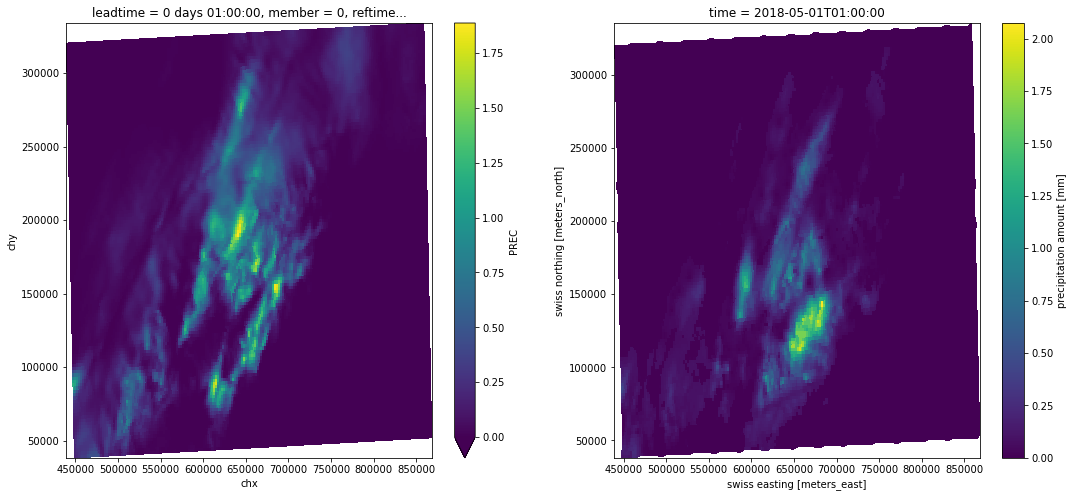

In [6]:
# Check coordinates for both datasets
fig, axes = plt.subplots(ncols=2, figsize=(18,8))
cosmo.PREC.isel(leadtime=1, member=0, reftime=0).plot.pcolormesh("chx", "chy", ax=axes[0], cmap='viridis', vmin=0)
real_points.isel(time=0).RR.plot.pcolormesh("chx", "chy", ax=axes[1])

In [9]:
def rain_histogram(img):
    plt.hist(np.ndarray.flatten(img.values), bins=20)

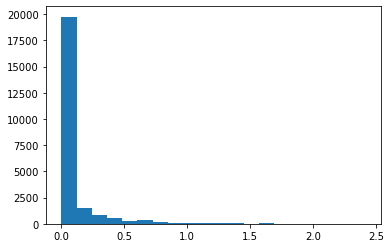

In [10]:
rain_histogram(real_points.RR.isel(time=2))

In [13]:
def plot_rain(img):
    mask = img < 0.1
    mask = mask.astype(int)
    mask.plot.pcolormesh()

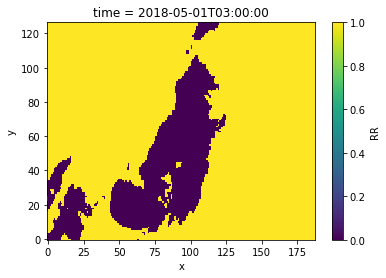

In [14]:
# yellow means no rain, purple means rain
plot_rain(real_points.RR.isel(time=2))

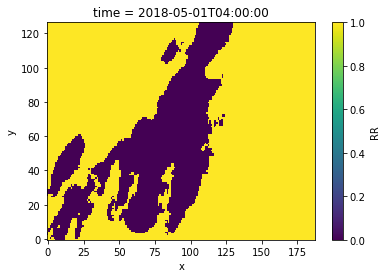

In [31]:
plot_rain(real_points.RR.isel(time=3))

In [65]:
def plot_zeros(img):
    mask = img == 0.0
    mask = mask.astype(int)
    mask.plot.pcolormesh()

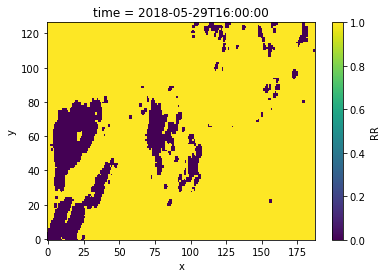

In [66]:
plot_zeros(real_points.RR.isel(time=687))

In [58]:
def rain_percentage(img):
    mask = img < 0.1
    mask = mask.astype(int)
    return 1 - mask.sum() / mask.size

In [62]:
rain_percentage(real_points.RR.isel(time=687).values)

0.06324342435918917

In [63]:
rain_percentage(real_points.RR.isel(time=3).values)

0.2635701122466074

In [75]:
def zeros_percentage(img):
    mask = img.values == 0.0
    mask = mask.astype(int)
    return mask.sum() / mask.size

In [76]:
zeros_percentage(real_points.RR.isel(time=687))

0.8768219132182945

In [32]:
def mm_to_categorical(x):
  if x < 0.1:
    return 0
  else:
    if x < 1:
      return 1
    else:
      if x < 5:
        return 2
      else:
        if x < 10:
          return 3
        else:
          return 4

In [33]:
convert_mm_to_categorical = np.vectorize(mm_to_categorical)

In [39]:
def plot_categories(img):
    obs_categories = convert_mm_to_categorical(img)
    plt.pcolormesh(obs_categories)
    plt.colorbar()

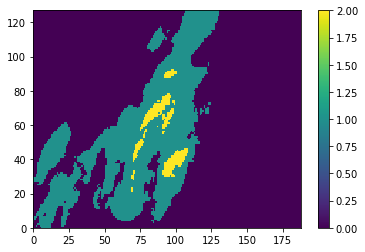

In [40]:
# Plot rain categories (e.g. no rain, light rain, rain, heavy rain)
plot_categories(real_points.RR.isel(time=3))

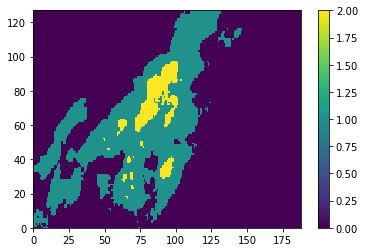

In [41]:
plot_categories(real_points.RR.isel(time=4))

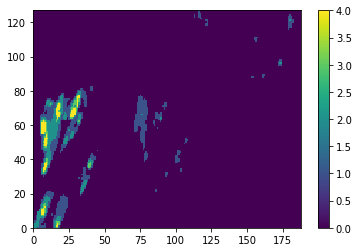

In [61]:
plot_categories(real_points.RR.isel(time=687))

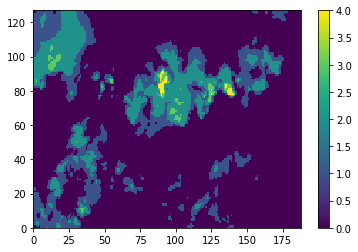

In [78]:
plot_categories(real_points.RR.isel(time=523))

In [46]:
real_points.RR.values.shape

(744, 127, 188)